In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv("DDOS attack-LOIC-UDP.csv")

In [3]:
df.head(10)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,17,114000070,11,0,352,0.0,32,32,32.000000,...,8,4000007.000,0.000000e+00,4000007.0,4000007.0,13800000.0,4.335167e+06,23000000.0,8999997.0,Benign
1,80,17,118031920,15,0,480,0.0,32,32,32.000000,...,8,5334643.667,4.507413e+06,10000000.0,1003910.0,11300000.0,1.200000e+07,42000000.0,5004033.0,Benign
2,80,6,93,2,0,0,0.0,0,0,0.000000,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
3,53,17,284,1,1,41,57.0,41,41,41.000000,...,8,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
4,53,17,1295,1,1,36,97.0,36,36,36.000000,...,8,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
5,443,6,100056279,24,19,11973,6261.0,1365,0,498.875000,...,20,2918495.500,2.762861e+06,4872133.0,964858.0,16775882.0,1.340167e+07,26252294.0,7299470.0,Benign
6,80,6,90,2,0,0,0.0,0,0,0.000000,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
7,80,6,54037784,2,0,0,0.0,0,0,0.000000,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
8,51209,6,2149,2,1,38,0.0,38,0,19.000000,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign
9,51330,6,87,3,1,31,0.0,31,0,10.333333,...,20,0.000,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.0,0.0,Benign


Label
Benign                  4054
DDOS attack-LOIC-UDP    1730
Name: count, dtype: int64


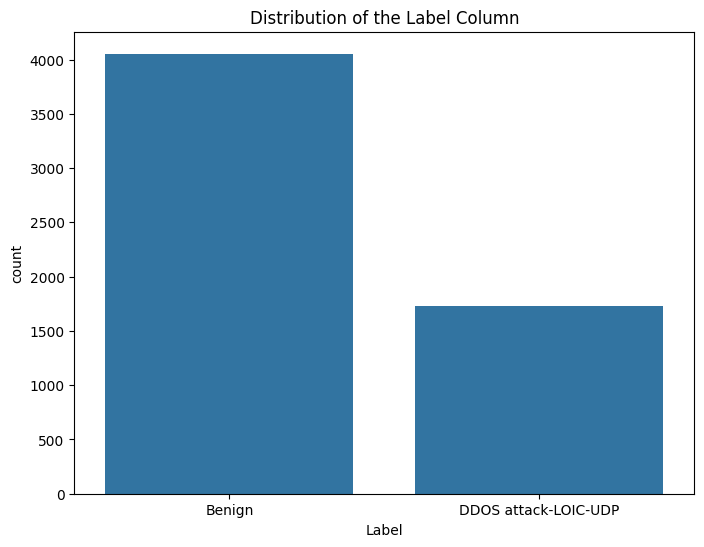

In [4]:
print(df['Label'].value_counts())

# Visualize the count of each class in the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of the Label Column')
plt.show()

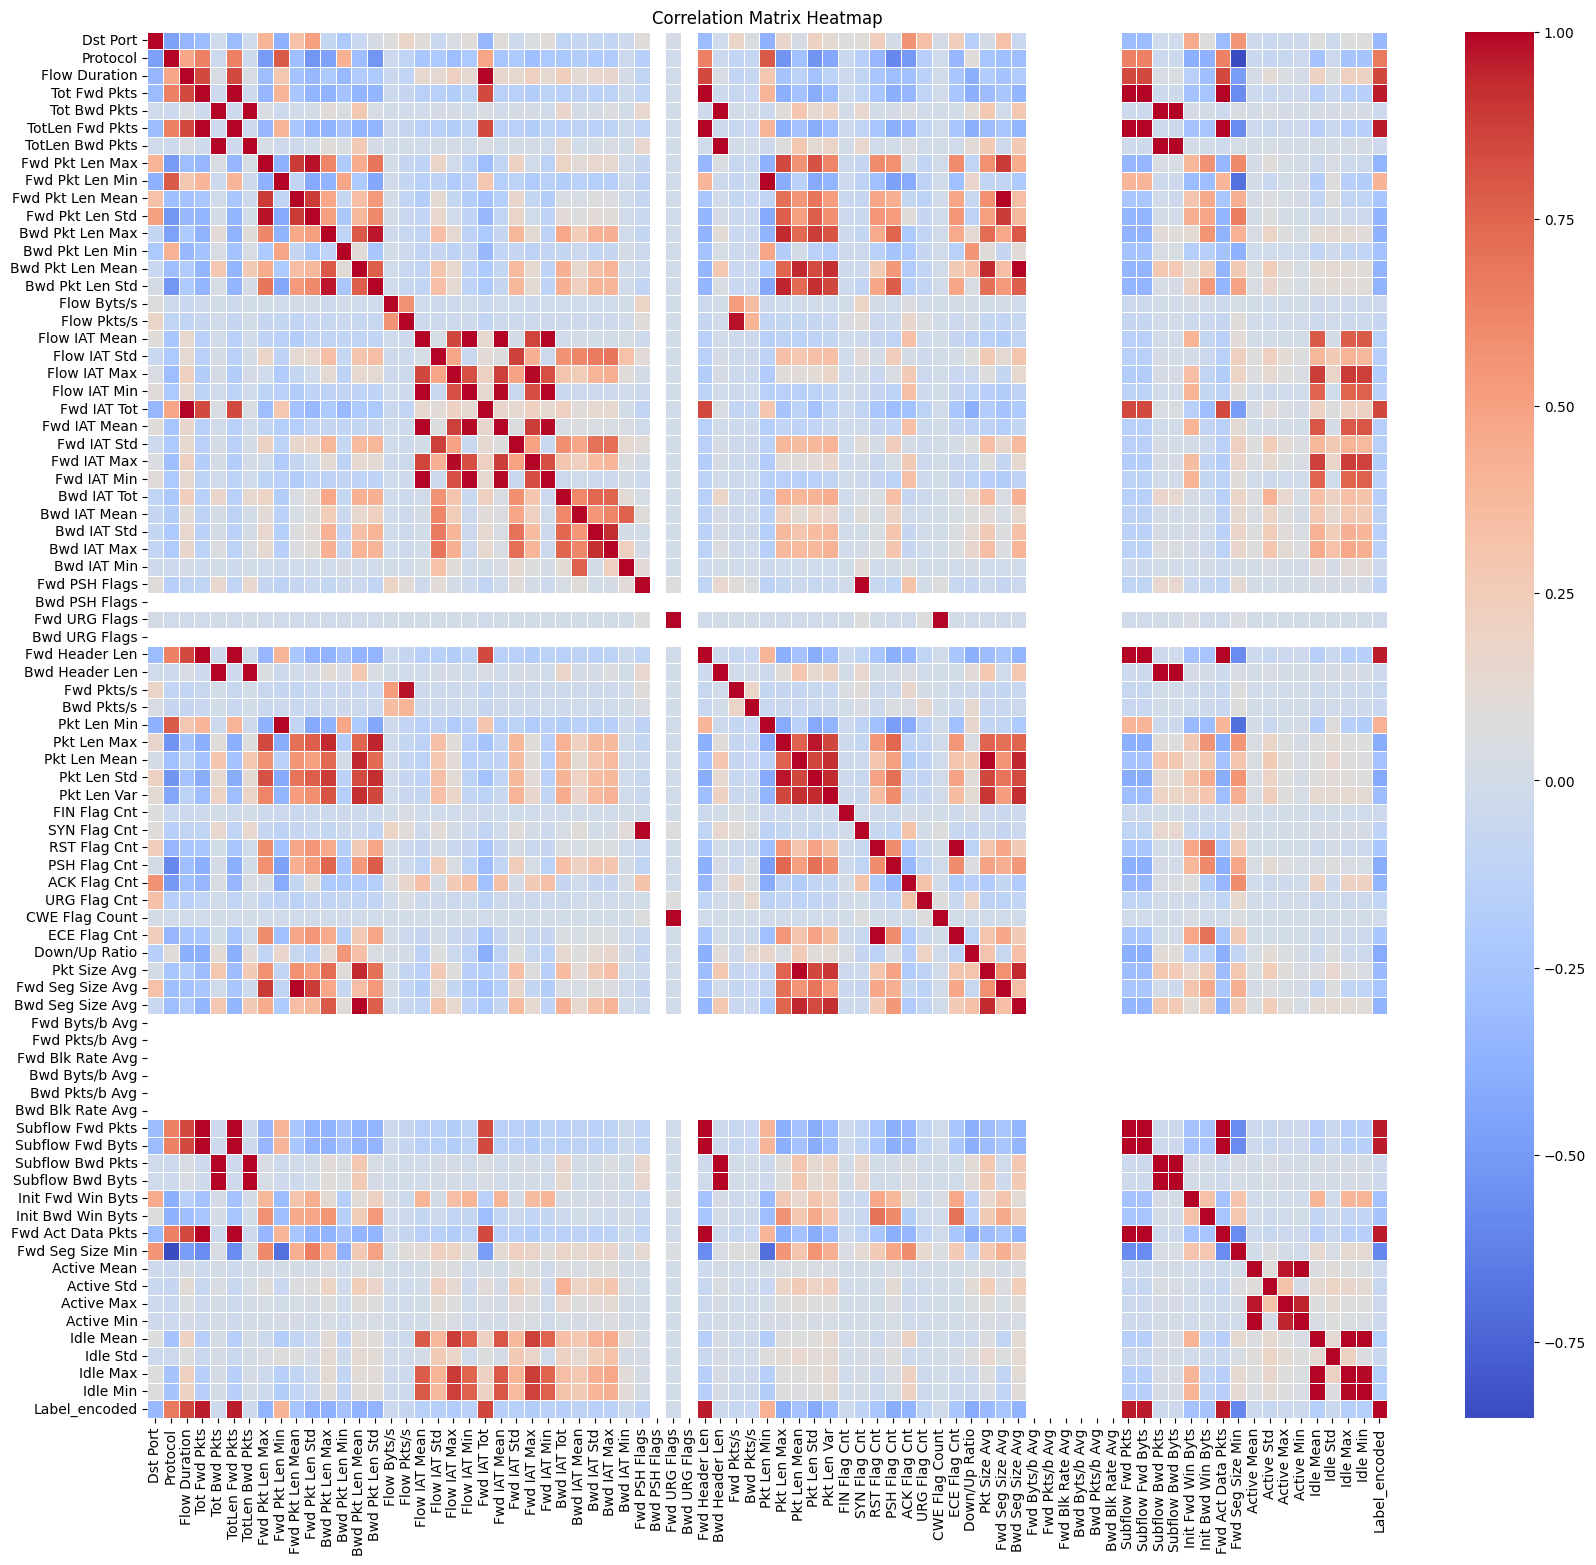

In [5]:
from sklearn.preprocessing import LabelEncoder
# Compute the correlation matrix
df1 = df.copy(deep=True)

# Encode the 'Label' column in df1
label_encoder = LabelEncoder()
df1['Label_encoded'] = label_encoder.fit_transform(df1['Label'])

# Drop non-numeric columns
df1_numeric = df1.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = df1_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
# Display the features most correlated with the encoded 'Label' column
correlation_with_label = correlation_matrix['Label_encoded'].sort_values(ascending=False)
print("Top 10 features most positively correlated with the Label:")
print(correlation_with_label.head(10))

Top 10 features most positively correlated with the Label:
Label_encoded        1.000000
Fwd Act Data Pkts    0.961004
Tot Fwd Pkts         0.961000
Subflow Fwd Pkts     0.961000
Subflow Fwd Byts     0.960997
TotLen Fwd Pkts      0.960997
Fwd Header Len       0.960987
Fwd IAT Tot          0.854294
Flow Duration        0.852385
Protocol             0.671659
Name: Label_encoded, dtype: float64


In [7]:
random forest :

DDOS attack-LOIC-UDP.csv	Fwd Header Len	0.117352011
DDOS attack-LOIC-UDP.csv	Subflow Fwd Pkts	0.11580892
DDOS attack-LOIC-UDP.csv	TotLen Fwd Pkts	0.106520007
DDOS attack-LOIC-UDP.csv	Subflow Fwd Byts	0.099563938
DDOS attack-LOIC-UDP.csv	Fwd Act Data Pkts	0.098135992
DDOS attack-LOIC-UDP.csv	Tot Fwd Pkts	0.08572351
DDOS attack-LOIC-UDP.csv	Fwd IAT Tot	0.06255696
DDOS attack-LOIC-UDP.csv	Fwd Pkt Len Min	0.032053397
DDOS attack-LOIC-UDP.csv	Bwd Pkts/s	0.026602032
DDOS attack-LOIC-UDP.csv	Pkt Len Min	0.024982301
DDOS attack-LOIC-UDP.csv	Flow IAT Min	0.020382199
DDOS attack-LOIC-UDP.csv	Subflow Bwd Pkts	0.018804842
DDOS attack-LOIC-UDP.csv	Pkt Len Mean	0.01846019
DDOS attack-LOIC-UDP.csv	Tot Bwd Pkts	0.015796812
DDOS attack-LOIC-UDP.csv	Fwd IAT Std	0.014378402
DDOS attack-LOIC-UDP.csv	Protocol	0.013903715
DDOS attack-LOIC-UDP.csv	Bwd Pkt Len Mean	0.013128181
DDOS attack-LOIC-UDP.csv	Pkt Len Std	0.009972269
DDOS attack-LOIC-UDP.csv	Pkt Len Var	0.009657675
DDOS attack-LOIC-UDP.csv	Fwd IAT Max	0.009250623
DDOS attack-LOIC-UDP.csv	Bwd Pkt Len Max	0.009125057
DDOS attack-LOIC-UDP.csv	Init Fwd Win Byts	0.008725137
DDOS attack-LOIC-UDP.csv	Fwd Pkt Len Mean	0.008645133
DDOS attack-LOIC-UDP.csv	Flow Duration	0.008493787
DDOS attack-LOIC-UDP.csv	Fwd IAT Min	0.007967756
autoencoder:

DDOS attack-LOIC-UDP.csv	ACK Flag Cnt	7.50217247
DDOS attack-LOIC-UDP.csv	Init Fwd Win Byts	7.434667587
DDOS attack-LOIC-UDP.csv	TotLen Fwd Pkts	7.32555151
DDOS attack-LOIC-UDP.csv	Dst Port	7.284388542
DDOS attack-LOIC-UDP.csv	Down/Up Ratio	7.203909397
DDOS attack-LOIC-UDP.csv	Fwd IAT Tot	6.933775902
DDOS attack-LOIC-UDP.csv	Protocol	6.801677227
DDOS attack-LOIC-UDP.csv	Tot Fwd Pkts	6.771099567
DDOS attack-LOIC-UDP.csv	Pkt Len Max	6.57131958
DDOS attack-LOIC-UDP.csv	Fwd Seg Size Min	6.488083363
DDOS attack-LOIC-UDP.csv	Subflow Fwd Byts	6.458899975
DDOS attack-LOIC-UDP.csv	Flow Duration	6.406918049
DDOS attack-LOIC-UDP.csv	ECE Flag Cnt	6.342353344
DDOS attack-LOIC-UDP.csv	Fwd Header Len	6.334619999
DDOS attack-LOIC-UDP.csv	Subflow Fwd Pkts	6.230935097
DDOS attack-LOIC-UDP.csv	Fwd Seg Size Avg	6.123316288
DDOS attack-LOIC-UDP.csv	TotLen Bwd Pkts	6.050606728
DDOS attack-LOIC-UDP.csv	PSH Flag Cnt	6.000104904
DDOS attack-LOIC-UDP.csv	FIN Flag Cnt	5.928827763
DDOS attack-LOIC-UDP.csv	Bwd Pkt Len Min	5.878480434
DDOS attack-LOIC-UDP.csv	Subflow Bwd Pkts	5.864566803
DDOS attack-LOIC-UDP.csv	RST Flag Cnt	5.859454155
DDOS attack-LOIC-UDP.csv	Active Std	5.839014053
DDOS attack-LOIC-UDP.csv	Fwd Act Data Pkts	5.828366756
DDOS attack-LOIC-UDP.csv	Bwd Pkt Len Max	5.710599422
lda:

DDOS attack-LOIC-UDP.csv	Fwd Act Data Pkts	24991.5404
DDOS attack-LOIC-UDP.csv	Tot Fwd Pkts	-9361.668386
DDOS attack-LOIC-UDP.csv	Subflow Fwd Pkts	-9361.668386
DDOS attack-LOIC-UDP.csv	Fwd Header Len	-3821.787383
DDOS attack-LOIC-UDP.csv	TotLen Fwd Pkts	-1217.025687
DDOS attack-LOIC-UDP.csv	Subflow Fwd Byts	-1217.025687
DDOS attack-LOIC-UDP.csv	Flow IAT Min	195.8091231
DDOS attack-LOIC-UDP.csv	Flow IAT Mean	-188.0470658
DDOS attack-LOIC-UDP.csv	Flow Duration	150.4911062
DDOS attack-LOIC-UDP.csv	Pkt Len Mean	128.9092838
DDOS attack-LOIC-UDP.csv	Pkt Size Avg	-122.813659
DDOS attack-LOIC-UDP.csv	Fwd IAT Tot	-95.00868941
DDOS attack-LOIC-UDP.csv	Bwd Header Len	69.22969991
DDOS attack-LOIC-UDP.csv	Flow IAT Max	-64.01753365
DDOS attack-LOIC-UDP.csv	Tot Bwd Pkts	-41.40690819
DDOS attack-LOIC-UDP.csv	Subflow Bwd Pkts	-41.40690819
DDOS attack-LOIC-UDP.csv	Pkt Len Std	37.15222447
DDOS attack-LOIC-UDP.csv	Fwd IAT Max	29.79534891
DDOS attack-LOIC-UDP.csv	Flow IAT Std	28.78193597
DDOS attack-LOIC-UDP.csv	Fwd IAT Min	28.34828164
DDOS attack-LOIC-UDP.csv	Subflow Bwd Byts	26.91318794
DDOS attack-LOIC-UDP.csv	TotLen Bwd Pkts	26.91318793
DDOS attack-LOIC-UDP.csv	Protocol	25.98734779
DDOS attack-LOIC-UDP.csv	Fwd Pkt Len Min	25.11633631
DDOS attack-LOIC-UDP.csv	Bwd IAT Tot	-22.84593058


SyntaxError: invalid syntax (2304449840.py, line 1)

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load feature importance data
lda_features = pd.DataFrame({
    'Feature': [
        'Flow IAT Min', 'Fwd IAT Min', 'Fwd IAT Std', 'Flow IAT Std', 'Idle Max', 'Idle Std', 
        'Flow IAT Max', 'Fwd IAT Max', 'Subflow Bwd Byts', 'TotLen Bwd Pkts', 'Fwd IAT Tot', 
        'Init Fwd Win Byts', 'Bwd Pkt Len Max', 'Fwd IAT Mean', 'Flow IAT Mean', 'PSH Flag Cnt', 
        'Pkt Len Max', 'Idle Mean', 'Flow Duration', 'Idle Min', 'Dst Port', 'Protocol', 
        'Bwd IAT Tot', 'Bwd IAT Max', 'RST Flag Cnt', 'Fwd Act Data Pkts', 'Tot Fwd Pkts', 
        'Subflow Fwd Pkts', 'Fwd Header Len', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 
        'Flow IAT Min', 'Flow IAT Mean', 'Flow Duration', 'Pkt Len Mean', 'Pkt Size Avg', 
        'Fwd IAT Tot', 'Bwd Header Len', 'Flow IAT Max', 'Tot Bwd Pkts', 'Subflow Bwd Pkts', 
        'Pkt Len Std', 'Fwd IAT Max', 'Flow IAT Std', 'Fwd IAT Min', 'Subflow Bwd Byts', 
        'TotLen Bwd Pkts', 'Protocol', 'Fwd Pkt Len Min', 'Bwd IAT Tot'
    ],
    'Importance': [
        -619.30, 523.50, 224.16, -119.34, 113.29, -107.87, 
        -88.54, -83.90, -63.91, 59.45, 46.34, 12.77, 
        12.48, -12.09, 11.86, -11.19, -9.86, 6.98, 
        -6.96, -5.72, -5.57, -4.66, -4.18, 3.94, 
        3.69, 24991.54, -9361.67, -9361.67, -3821.79, -1217.03, 
        -1217.03, 195.81, -188.05, 150.49, 128.91, 
        -122.81, -95.01, 69.23, -64.02, -41.41, 37.15, 
        29.80, 28.78, 28.35, 26.91, 26.91, 25.99, 
        25.12, -22.85
    ]
})

rf_features = pd.DataFrame({
    'Feature': ['Init Fwd Win Byts', 'Fwd IAT Min', 'Dst Port', 'Fwd IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 
                'Flow Duration', 'Fwd Pkts/s', 'Fwd IAT Mean', 'Flow IAT Max', 'Fwd Header Len', 
                'Tot Bwd Pkts', 'Subflow Bwd Pkts', 'Bwd Pkts/s', 'Fwd Pkt Len Mean', 'Subflow Fwd Pkts', 
                'Flow Pkts/s', 'Pkt Len Mean', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Pkt Len Max', 
                'Bwd Header Len', 'Pkt Len Var', 'Bwd Seg Size Avg', 'Subflow Fwd Byts'],
    'Importance': [0.2138, 0.1162, 0.0770, 0.0476, 0.0450, 0.0427, 0.0342, 0.0291, 0.0263, 0.0251, 
                   0.0246, 0.0180, 0.0173, 0.0161, 0.0153, 0.0148, 0.0146, 0.0141, 0.0136, 0.0133, 
                   0.0119, 0.0113, 0.0105, 0.0104]
})

# Corrected number of elements for AE
ae_features = pd.DataFrame({
    'Feature': ['Idle Std', 'Fwd IAT Std', 'Fwd IAT Max', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Tot', 
                'Fwd IAT Min', 'Flow Duration', 'Flow IAT Mean', 'CWE Flag Count', 'Fwd URG Flags', 
                'Flow IAT Min', 'TotLen Fwd Pkts', 'Idle Max', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 
                'Bwd Pkts/s', 'Fwd Act Data Pkts', 'Tot Bwd Pkts', 'Fwd IAT Mean'],
    'Importance': [54.7281, 51.0984, 50.3704, 49.9599, 46.4220, 39.3114, 38.6952, 35.7530, 32.9912, 
                   31.3267, 30.9491, 27.8130, 24.8368, 24.6933, 24.6427, 24.0329, 23.6803, 23.4429, 
                   23.3394, 22.3146]
})

# Concatenate LDA, RF, and AE features
all_features = pd.concat([lda_features, rf_features, ae_features], keys=['LDA', 'RF', 'AE'])

# Ensure 'Importance' is numeric
all_features['Importance'] = pd.to_numeric(all_features['Importance'], errors='coerce')

# Drop NaN and aggregate
all_features = all_features.dropna(subset=['Importance'])
feature_importance_avg = all_features.groupby('Feature')['Importance'].mean().reset_index()
feature_importance_avg = feature_importance_avg.sort_values(by='Importance', ascending=False)

# Top features
top_features = feature_importance_avg.head(20)
print(top_features)


ValueError: All arrays must be of the same length

In [16]:
import pandas as pd

# Data for Random Forest, Autoencoder, and LDA features (LOIC UDP)
lda_features = pd.DataFrame({
    'Feature': [
        'Fwd Header Len', 'Subflow Fwd Pkts', 'TotLen Fwd Pkts', 'Subflow Fwd Byts', 
        'Fwd Act Data Pkts', 'Tot Fwd Pkts', 'Fwd IAT Tot', 'Fwd Pkt Len Min', 
        'Bwd Pkts/s', 'Pkt Len Min', 'Flow IAT Min', 'Subflow Bwd Pkts', 'Pkt Len Mean', 
        'Tot Bwd Pkts', 'Fwd IAT Std', 'Protocol', 'Bwd Pkt Len Mean', 'Pkt Len Std', 
        'Pkt Len Var', 'Fwd IAT Max', 'Bwd Pkt Len Max', 'Init Fwd Win Byts', 
        'Fwd Pkt Len Mean', 'Flow Duration', 'Fwd IAT Min', 'ACK Flag Cnt', 'Dst Port', 
        'Down/Up Ratio', 'Fwd Seg Size Min', 'Fwd Seg Size Avg', 'PSH Flag Cnt', 
        'FIN Flag Cnt', 'Bwd Pkt Len Min', 'RST Flag Cnt', 'Active Std', 'Fwd Seg Size Avg'
    ],
    'RandomForest_Importance': [
        0.117352011, 0.11580892, 0.106520007, 0.099563938, 0.098135992, 0.08572351, 
        0.06255696, 0.032053397, 0.026602032, 0.024982301, 0.020382199, 0.018804842, 
        0.01846019, 0.015796812, 0.014378402, 0.013903715, 0.013128181, 0.009972269, 
        0.009657675, 0.009250623, 0.009125057, 0.008725137, 0.008645133, 0.008493787, 
        0.007967756, 7.50217247, 7.434667587, 7.32555151, 7.284388542, 7.203909397, 
        6.933775902, 6.801677227, 6.771099567, 6.57131958, 6.488083363, 6.458899975
    ],
    'Autoencoder_Importance': [
        7.50217247, 7.434667587, 7.32555151, 7.284388542, 7.203909397, 6.933775902, 
        6.801677227, 6.771099567, 6.57131958, 6.488083363, 6.458899975, 6.406918049, 
        6.342353344, 6.334619999, 6.230935097, 6.123316288, 6.050606728, 6.000104904, 
        5.928827763, 5.878480434, 5.864566803, 5.859454155, 5.839014053, 5.828366756, 
        5.710599422, 5.864566803, 5.859454155, 6.123316288, 6.050606728, 6.000104904, 
        5.710599422, 5.839014053, 5.828366756
    ],
    'LDA_Importance': [
        24991.5404, -9361.668386, -9361.668386, -3821.787383, -1217.025687, -1217.025687, 
        195.8091231, -188.0470658, 150.4911062, 128.9092838, -122.813659, -95.00868941, 
        69.22969991, -64.01753365, -41.40690819, -41.40690819, 37.15222447, 29.79534891, 
        28.78193597, 28.34828164, 26.91318794, 26.91318793, 25.98734779, 25.11633631, 
        -22.84593058
    ]
})

# Ensure all the data has the same length (in case of any mismatch)
print(lda_features)

# If you need to use this data for a model or visualization, here's an example
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(lda_features['Feature'], lda_features['RandomForest_Importance'], color='blue', alpha=0.6, label='Random Forest')
plt.barh(lda_features['Feature'], lda_features['Autoencoder_Importance'], color='orange', alpha=0.6, label='Autoencoder')
plt.barh(lda_features['Feature'], lda_features['LDA_Importance'], color='green', alpha=0.6, label='LDA')

plt.xlabel('Importance')
plt.title('Feature Importance for LOIC UDP Dataset')
plt.legend()
plt.show()


ValueError: All arrays must be of the same length